# Neural Network Implementation in PyTorch

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
# Create input (features) and output (labels)
x = torch.arange(0, 1, 0.02).unsqueeze(1)
w_true = 3.0
b_true = 0.5
y = w_true * x + b_true

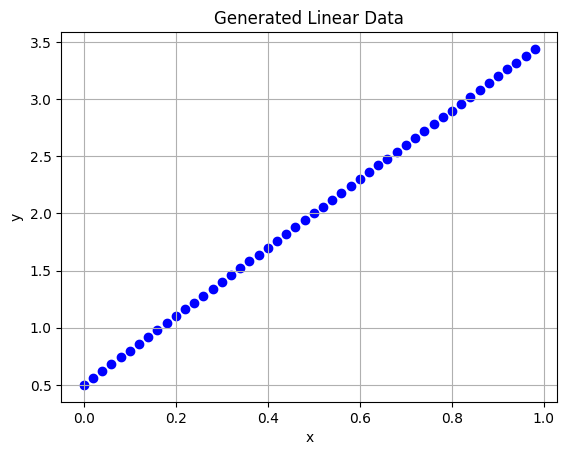

In [4]:
# Visualize the data
plt.scatter(x, y, color='blue')
plt.title("Generated Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [5]:
### Split into train/test

x_train, x_test = x[:30], x[30:]
y_train, y_test = y[:30], y[30:]

In [6]:
### Custom Linear Regression Model
import torch.nn as nn

class CustomLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias

model = CustomLinearRegression()


In [7]:
### Loss and Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [8]:
### Training the Model
for epoch in range(200):
    model.train()
    pred = model(x_train)
    loss = loss_fn(pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 1.3948
Epoch 20: Loss = 0.2077
Epoch 40: Loss = 0.1664
Epoch 60: Loss = 0.1334
Epoch 80: Loss = 0.1069
Epoch 100: Loss = 0.0857
Epoch 120: Loss = 0.0687
Epoch 140: Loss = 0.0551
Epoch 160: Loss = 0.0441
Epoch 180: Loss = 0.0354


In [9]:
### Evaluate on Test Set
model.eval()
with torch.no_grad():
    predictions = model(x_test)
    test_loss = loss_fn(predictions, y_test)
    print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.2408


In [10]:
### Evaluation Metrics

mae = torch.mean(torch.abs(predictions - y_test))
mse = torch.mean((predictions - y_test) ** 2)
rmse = torch.sqrt(mse)
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MAE: 0.4778, MSE: 0.2408, RMSE: 0.4907


In [11]:
##Part 2: PyTorch Built-in Linear Model
from torch import device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [12]:
# Define a simple linear model using built-in layers
class TorchLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = TorchLinearModel().to(device)

In [13]:
# Prepare Data for Training
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

In [14]:
# Train the Model
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(100):
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 2.4576
Epoch 10: Loss = 0.1192
Epoch 20: Loss = 0.0912
Epoch 30: Loss = 0.0816
Epoch 40: Loss = 0.0730
Epoch 50: Loss = 0.0654
Epoch 60: Loss = 0.0585
Epoch 70: Loss = 0.0524
Epoch 80: Loss = 0.0469
Epoch 90: Loss = 0.0420


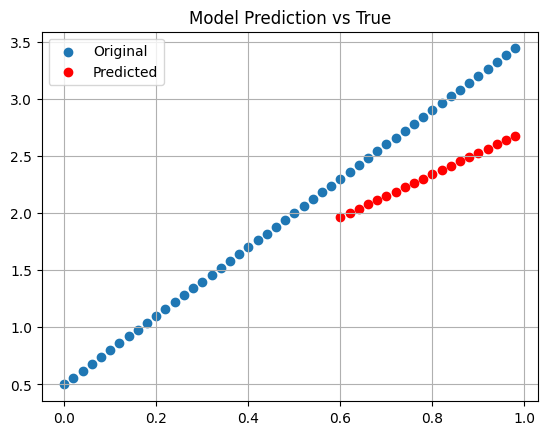

In [15]:
# Predict and Visualize
model.eval()
with torch.no_grad():
    preds = model(x_test).cpu()

plt.scatter(x.cpu(), y.cpu(), label='Original')
plt.scatter(x_test.cpu(), preds, color='red', label='Predicted')
plt.legend()
plt.title("Model Prediction vs True")
plt.grid(True)
plt.show()

In [16]:
# Part 3: Binary Classification

from sklearn.datasets import make_circles
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.05)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# Binary Classifier Model
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = CircleClassifier()

In [18]:
# Train the Model
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(200):
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 0.6857
Epoch 20: Loss = 0.6660
Epoch 40: Loss = 0.6398
Epoch 60: Loss = 0.6032
Epoch 80: Loss = 0.5590
Epoch 100: Loss = 0.5104
Epoch 120: Loss = 0.4640
Epoch 140: Loss = 0.4218
Epoch 160: Loss = 0.3810
Epoch 180: Loss = 0.3439


In [19]:
# Evaluate Model
model.eval()
with torch.no_grad():
    preds = model(x_test).round()
acc = accuracy_score(y_test, preds)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.98


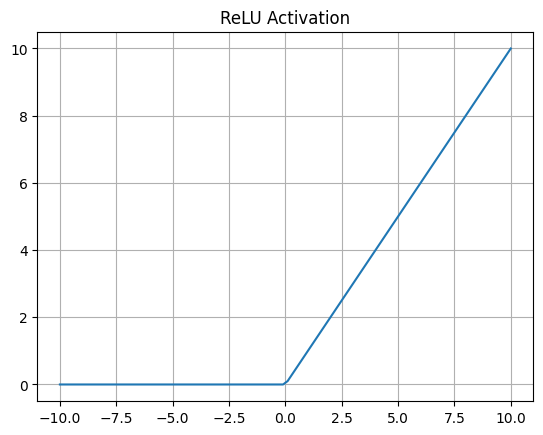

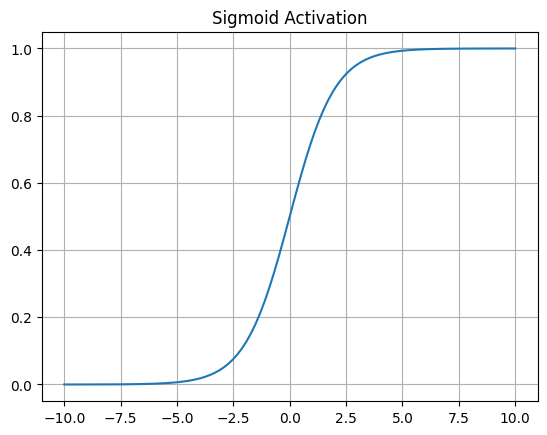

In [20]:
#Part 4: Multi-Class Classification with Activation Functions

# Activation Function Demos
import torch.nn.functional as F

x_vals = torch.linspace(-10, 10, 100)
relu = F.relu(x_vals)
sigmoid = torch.sigmoid(x_vals)

def show_activation(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.grid(True)
    plt.show()

show_activation(x_vals, relu, "ReLU Activation")
show_activation(x_vals, sigmoid, "Sigmoid Activation")


In [21]:
# Multi-Class Classification
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X_blob, y_blob = make_blobs(n_samples=300, centers=3, n_features=2)
scaler = StandardScaler()
X_blob = torch.tensor(scaler.fit_transform(X_blob), dtype=torch.float32)
y_blob = torch.tensor(y_blob, dtype=torch.long)

In [22]:
# Model
class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.net(x)

model = BlobModel()

In [23]:
### Training with CrossEntropy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

for epoch in range(200):
    model.train()
    y_logits = model(X_blob)
    loss = loss_fn(y_logits, y_blob)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.3429
Epoch 20, Loss: 0.2178
Epoch 40, Loss: 0.1054
Epoch 60, Loss: 0.0685
Epoch 80, Loss: 0.0505
Epoch 100, Loss: 0.0400
Epoch 120, Loss: 0.0331
Epoch 140, Loss: 0.0282
Epoch 160, Loss: 0.0246
Epoch 180, Loss: 0.0218


## Summary of Concepts Used:
- Linear regression (manual and built-in)
- Training and loss loops
- Binary classification
- Multi-class classification
- Custom activation function visuals
- Evaluation metrics: MSE, MAE, RMSE, accuracy
- Plotting predictions
